In [1]:
import numpy as np
import os
from PIL import Image
import csv
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.utils.validation import check_is_fitted
from sklearn.utils import check_array, check_X_y
from sklearn import manifold

# File path

In [2]:
train_img_path = './train_images'
test_img_path = './test_images'
train_label_file = 'train.csv'
test_label_file = 'test.csv'

In [3]:
train_img = []
train_label = []

# LOAD IMAGE

In [4]:
img = 0
for file in os.listdir(train_img_path):
    img = Image.open(train_img_path + '/' + file)
    im = np.array(img).reshape(-1)
    train_img.append(im)
train_img = np.array(train_img)
#train_img.shape
#img

In [5]:
i = 0
with open(train_label_file, newline = '') as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        if i != 0:
            train_label.append(int(row[1]))
        i = i + 1
train_label = np.array(train_label)
train_label.shape

(2528,)

# PCA

In [14]:
pca = PCA(n_components=128)
pca_img = pca.fit_transform(train_img[-512:])
pca_inv_img = pca.inverse_transform(pca_img)

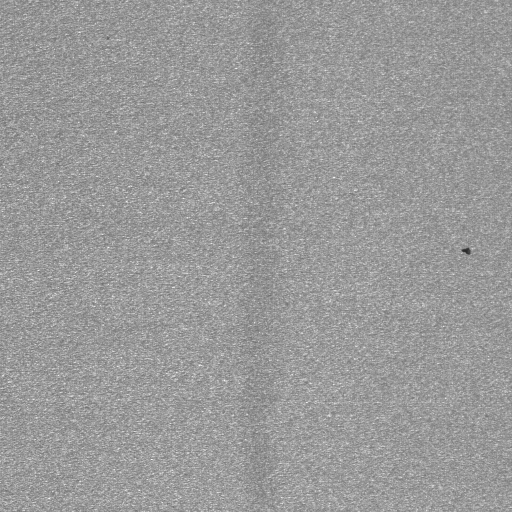

In [29]:
img_ori = Image.fromarray(train_img[-4].reshape(512,512), 'L')
img_ori

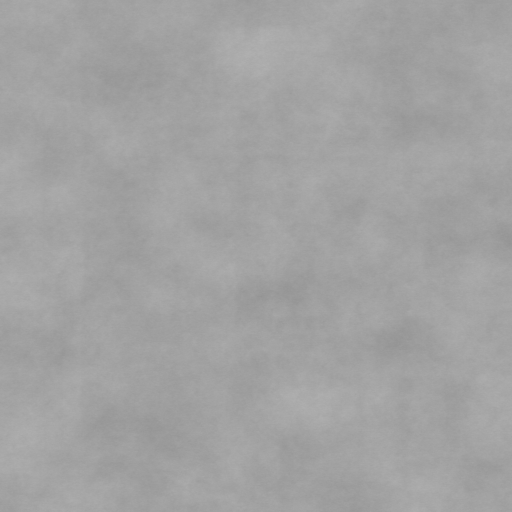

In [31]:
temp = pca_inv_img[-4]
img_compressed = (np.stack(temp,axis = 0)).astype(np.uint8)
img_pca = Image.fromarray(img_compressed.reshape(512,512), 'L')
img_pca

# LDA

In [19]:
def inverse_transform(lda, x):
    if lda.solver == 'lsqr':
        raise NotImplementedError("(inverse) transform not implemented for 'lsqr' "
                                  "solver (use 'svd' or 'eigen').")
    check_is_fitted(lda, ['xbar_', 'scalings_'], all_or_any=any)

    inv = np.linalg.pinv(lda.scalings_)

    x = check_array(x)
    if lda.solver == 'svd':
        x_back = np.dot(x, inv) + lda.xbar_
    elif lda.solver == 'eigen':
        x_back = np.dot(x, inv)

    return x_back

In [20]:
lda = LinearDiscriminantAnalysis(n_components = 5)
clf = lda.fit(train_img[-512:], train_label[-512:]).transform(train_img[-512:])
Xr = inverse_transform(lda, clf)
Xr

array([[177.60463425, 178.90222729, 178.34521874, ..., 179.14060827,
        177.95787684, 178.2207143 ],
       [176.01301237, 178.28840206, 176.83031627, ..., 183.21969809,
        182.86951041, 182.75942297],
       [177.49576674, 178.78298072, 178.25413867, ..., 178.7934233 ,
        177.56748431, 177.87061409],
       ...,
       [176.98667588, 178.7428557 , 177.75382627, ..., 181.26776278,
        180.46908797, 180.59998212],
       [177.81979663, 179.09867786, 178.56454675, ..., 179.13680848,
        177.87095732, 178.19901695],
       [183.18265933, 182.42922855, 182.38095809, ..., 180.48071938,
        180.10328796, 179.76172452]])

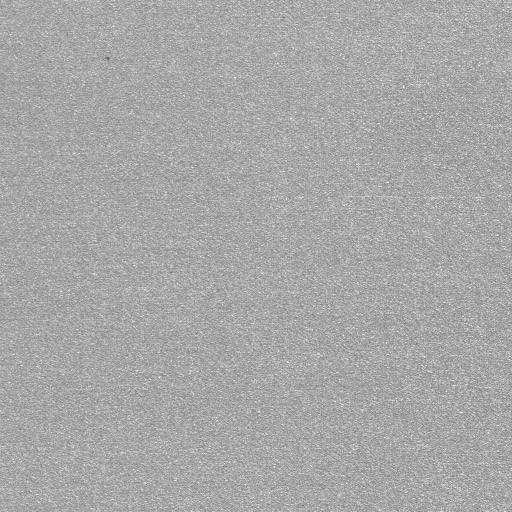

In [24]:
img_ori = Image.fromarray(train_img[-2].reshape(512,512), 'L')
img_ori

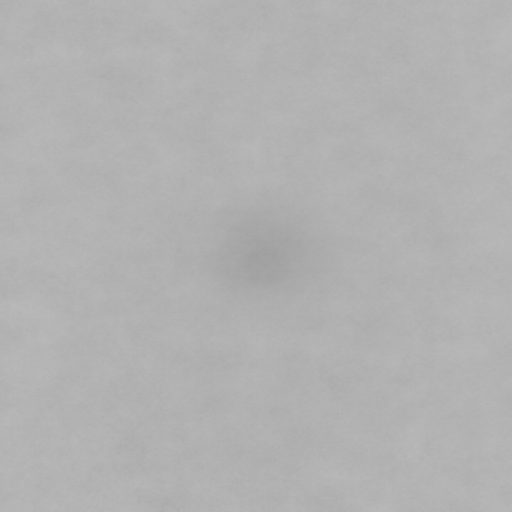

In [33]:
img_compressed = (np.stack(Xr[-5],axis = 0)).astype(np.uint8)
img_lda = Image.fromarray(img_compressed.reshape(512,512), 'L')
img_lda

In [20]:
y = clf.predict(train_img)
#print(y == train_label[-512:])
print(sum(y == train_label)/2528)

0.7393196202531646


# TSNE

In [ ]:
'''
TSNE Dimensionality reduction
'''
# Dimensionality reduction 784->2
tsne = manifold.TSNE(n_components=2, init='random',
                     random_state=5, verbose=1).fit_transform(train_img)
x_min, x_max = tsne.min(0), tsne.max(0)

X_norm = (tsne - x_min) / (x_max - x_min)  # normalization
plt.figure()
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(train_label[i]), color=plt.cm.Set3(train_label[i]),
             fontdict={'weight': 'bold', 'size': 9})

plt.xticks([])
plt.yticks([])
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2528 samples in 268.646s...
